XGBoost Evaluation Metrics 
      Metric     Score
0   Accuracy   95.9500
1  Precision  100.0000
2     Recall   92.1100
3   F1 Score   95.8900
4        MCC   92.2064


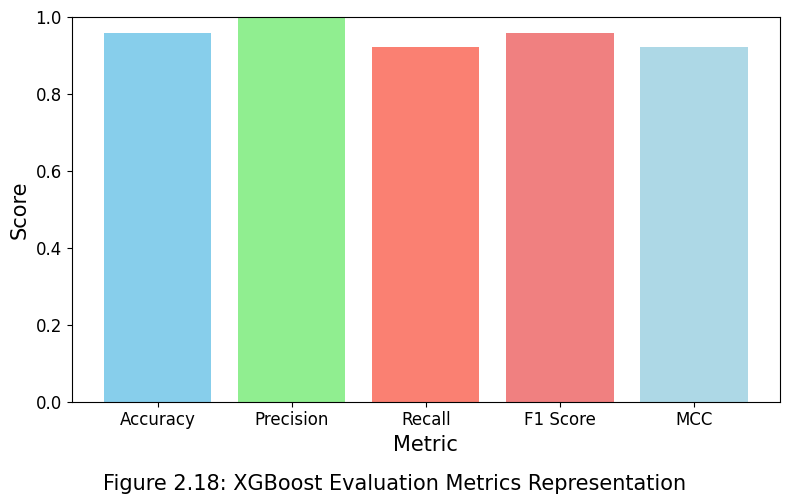

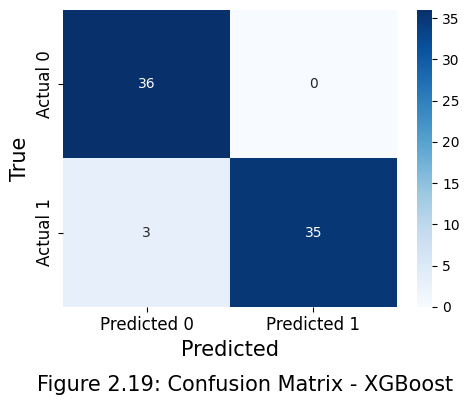

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from xgboost import XGBClassifier

# Downloading and saving dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'
df = pd.read_csv(url)
df.head()
# Feature/Target separation
X = df.drop(['name', 'status'], axis=1)
y = df['status']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_scaled, y)



# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Hyperparameter tuning for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='f1_macro', verbose=0)
grid_xgb.fit(X_train, y_train)

# Best model & prediction
best_xgb_model = grid_xgb.best_estimator_
y_pred = best_xgb_model.predict(X_test)


# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
mcc = matthews_corrcoef(y_test, y_pred)



results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'],
    'Score': [round(accuracy * 100, 2), round(precision * 100, 2), round(recall * 100, 2), round(f1 * 100, 2), round(mcc*100, 4)]
})

print("XGBoost Evaluation Metrics ")
print(results)

# Data for the chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC']
scores = results['Score'].values / 100
# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightblue'])
plt.xlabel('Metric', fontsize=15, color='black')
plt.ylabel('Score', fontsize=15,color='black')

plt.ylim(0, 1)
plt.tick_params(axis='both', colors='black', labelsize=12)
plt.figtext(0.5, 0.01, 'Figure 2.18: XGBoost Evaluation Metrics Representation',
            wrap=True, horizontalalignment='center', fontsize=15)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('xgb_metrics.png', dpi=300)
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted', fontsize=15, color='black')
plt.ylabel('True', fontsize=15, color='black')
plt.tick_params(axis='both', colors='black', labelsize=12)
# plt.title('Confusion Matrix - Random Forest')

plt.figtext(0.5, 0.01, 'Figure 2.19: Confusion Matrix - XGBoost',
            wrap=True, horizontalalignment='center', fontsize=15)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('confusion_matrix_xgb.png', dpi=300)
plt.show()


